In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import os

This generates an n-gram. It receives an n which specifies the n in n-gram. It also receives an array called levels which contains the level matrix separated by columns.

In [2]:
def build_n_gram(n, levels):
    ngram = {}
    
    for level_matrix in levels:
        columns = [[] for i in range(len(level_matrix[0]))]

        for row in level_matrix:
            for i in range(len(row)):
                columns[i].append(row[i])

        prior = []
        for col in columns:
            json_col = json.dumps(col)
            if len(prior) == n - 1:
                json_prior = json.dumps(prior)
                
                if json_prior not in ngram:
                    ngram[json_prior] = {}
                    ngram[json_prior][json_col] = 1
                elif json_col not in ngram[json_prior]:
                    ngram[json_prior][json_col] = 1
                else:
                    ngram[json_prior][json_col] += 1
                
                prior.pop(0)

            prior.append(col)

    return ngram

This sets the min and max n that will be displayed in the histogram. It receives an array of levels and with it, it builds the n-grams and generates a histogram that uses each n-gram. Right now it is hardcoded for each n as can be seen by the variables for colors and labels.

In [3]:
def build_histogram(levels):
    min_n = 2
    max_n = 5

    colors = ['red', 'blue', 'green']
    labels = ['n=2', 'n=3', 'n=4']

    # build n-grams
    n_grams = []
    for n in range(min_n, max_n):
        n_grams.append(build_n_gram(n, levels))

    # build histogram array and plot results. 
    max_count = 0
    outputs = []
    for n_gram in n_grams:
        outputs.append([])
        for prior in n_gram:
            outputs[-1].append(len(n_gram[prior]))
            max_count = max(max_count, len(n_gram[prior]))
    
    plt.figure(figsize=(20, 8))
    plt.xlabel("Outputs")
    plt.ylabel("Priors")
    plt.title("Priors with the Same Number of Outputs")
    n, bins, patches = plt.hist(
        outputs, 
        bins=range(1,max_count +1), 
        alpha=0.5, 
        edgecolor='black', 
        linewidth=1.2, 
        color=colors, 
        label=labels)
    
    plt.xticks(range(1, max_count))
    plt.xlim(1)
    plt.legend()
    plt.show()

    print(f'2: {len(n_grams[0])}')
    print(f'3: {len(n_grams[1])}')
    print(f'4: {len(n_grams[2])}')

This goes through files in the path it receives level matrices by column for each.

In [4]:
def get_file_contents(path):
    file_contents = []
    for file_name in os.listdir(path):
        if 'meta' in file_name:
            continue
        
        # read level file in as json
        file_path = os.path.join(path, file_name)
        if os.path.isdir(file_path):
            continue

        f = open(file_path)
        content = f.read()
        f.close()

        # convert file to json and into a list of columns
        file_contents.append(json.loads(content))
    
    return file_contents

This builds level matrices for the mario levels from the VGLC. In this case we use a modified version that has been converted to JSON, refer to [convert_mario_levels.py](./convert_mario_levels.py) to see how this is accomplished. Another is built using the custom levels for the game. Finally, a combination of the two is also also built.

In [5]:
super_mario_bros = get_file_contents(os.path.join('..', 'Assets', 'Resources', 'Levels', 'SuperMarioBros'))
custom = get_file_contents(os.path.join('..', 'Assets', 'Resources', 'Levels'))
both = custom.copy()
both.extend(super_mario_bros)

### VGLC Histogram

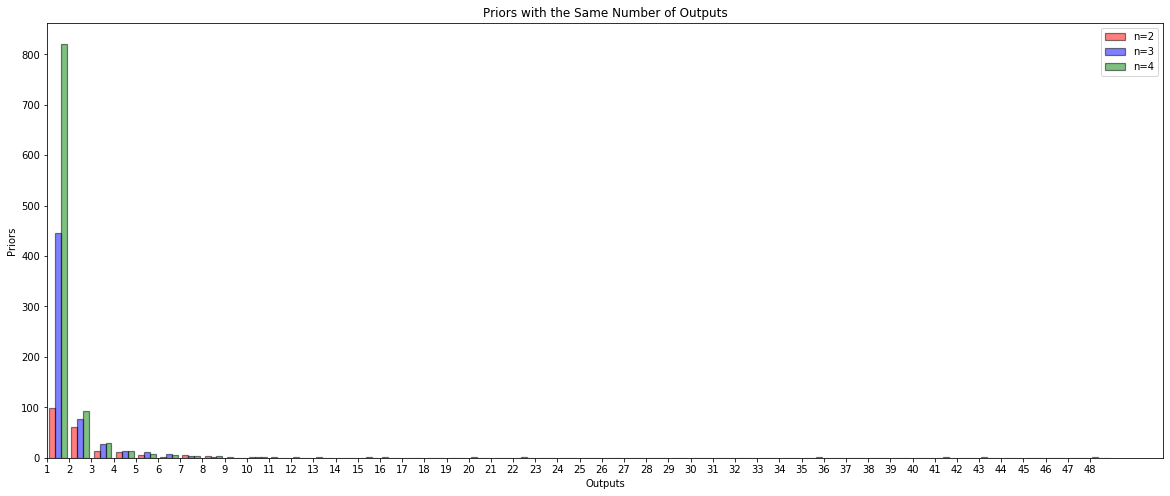

2: 209
3: 593
4: 979


In [6]:
build_histogram(super_mario_bros)

### Custom Histogram

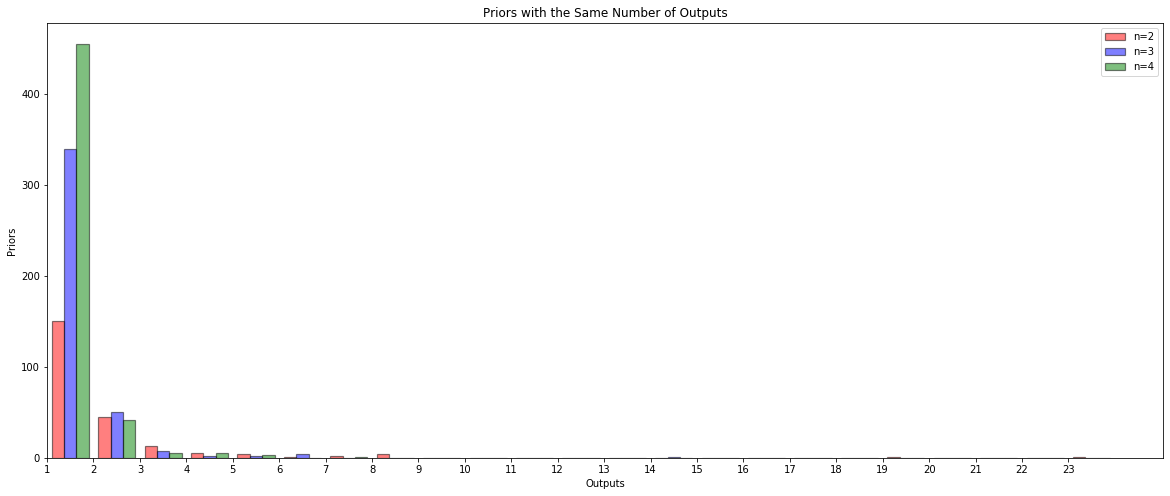

2: 226
3: 406
4: 510


In [7]:
build_histogram(custom)

### Combination of Custom and VGLC

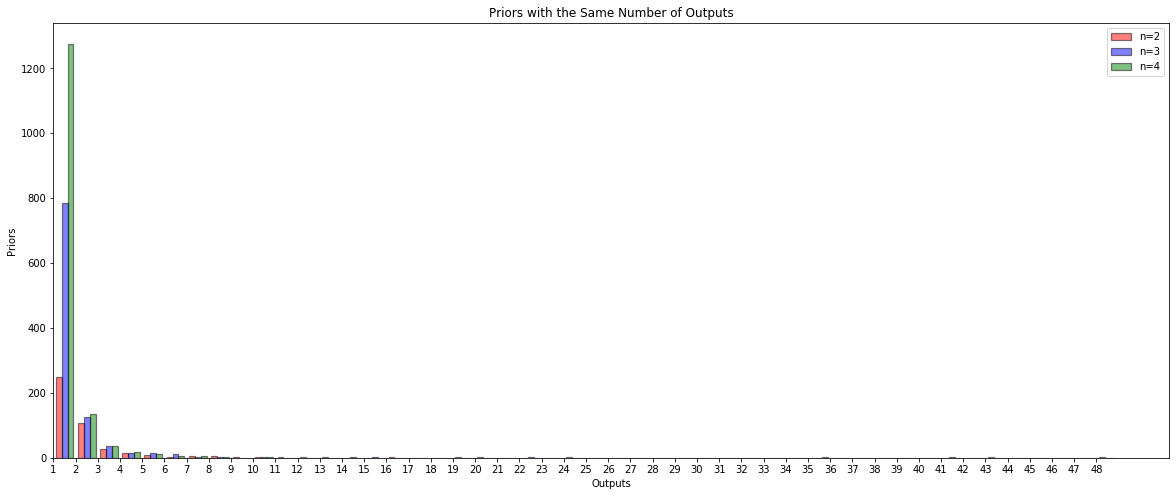

2: 435
3: 999
4: 1489


In [8]:
build_histogram(both)

As can be seen, the mario levels VGLC share no common columns with the custom-made columns (979 + 510 = 1489). Meaning, if we want to take advantage of the extra data than extra work is required for the developer to get them to work together.